# Udacity - Communicate Data Findings (Dataset: Loan Data from Prosper
## by Justin Olgui

## Preliminary Wrangling

This dataset contains data from over 100,000 loans. Each row contains information about the borrower such as APR, Employment status, credit rating, term, occupation, etc. Who is prosper? Prosper is a San Francisco based company in the peer-to-peer lending marketplace in the United States. Since 2005, Prosper has facilitated more than $15 billion in loans to more than 930,000 people.

In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [15]:
# Load csv into dataframe
Loan_df = pd.read_csv('prosperLoanData.csv')

In [16]:
# Check to ensure it was read in properly
Loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [17]:
#Checking out the structure of our dataset
Loan_df.shape

(113937, 81)

In [18]:
# Checking out the dataset's info
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?

This dataset contains 113937 loans with 81 different variables
Column definitions can be found in "Prosper Loan Data - Columns Definitions.csv"

### What is/are the main feature(s) of interest in your dataset?

The main feature i'm interested in is the Prosperscore, and seeing how it differs from the traditional score which can at times serve as a barrier to those who are underserved from a lending perspective.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think some of the standard finance metrics will be helpful in this investigation. (DebtToIncome, IncomeRange, StatedMonthlyIncome, CurrentCreditLines, EmploymentStatus, ETC.)

In [121]:
# We'll now condense our dataset as it is not feasible to use all 81 variables
Condensed_prosper = Loan_df[['ListingKey', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', \
                             'BorrowerAPR', 'ProsperScore', 'BorrowerState', 'IncomeVerifiable', 'StatedMonthlyIncome', \
                             'MonthlyLoanPayment', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount']]

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

So we'll begin by exploring distributions for individual variables to get a feel for the data so that we can further deepen our analysis.

In [20]:
#We'll check to see we got all the right information
Condensed_prosper

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerAPR,ProsperScore,BorrowerState,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,InvestmentFromFriendsCount,InvestmentFromFriendsAmount
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,36,Completed,0.16516,NaN,CO,True,3083.333333,330.43,0,0.0
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,36,Current,0.12016,7.0,CO,True,6125.000000,318.93,0,0.0
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,36,Completed,0.28269,NaN,GA,True,2083.333333,123.32,0,0.0
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,36,Current,0.12528,9.0,GA,True,2875.000000,321.45,0,0.0
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,36,Current,0.24614,4.0,MN,True,9583.333333,563.97,0,0.0
5,0F05359734824199381F61D,2013-12-14 08:26:37.093000000,NaN,60,Current,0.15425,10.0,NM,True,8333.333333,342.37,0,0.0
6,0F0A3576754255009D63151,2013-04-12 09:52:56.147000000,NaN,36,Current,0.31032,2.0,KS,True,2083.333333,122.67,0,0.0
7,0F1035772717087366F9EA7,2013-05-05 06:49:27.493000000,NaN,36,Current,0.23939,4.0,CA,True,3355.750000,372.60,0,0.0
8,0F043596202561788EA13D5,2013-12-02 10:43:39.117000000,NaN,36,Current,0.07620,9.0,IL,True,3333.333333,305.54,0,0.0
9,0F043596202561788EA13D5,2013-12-02 10:43:39.117000000,NaN,36,Current,0.07620,11.0,IL,True,3333.333333,305.54,0,0.0


In [21]:
Condensed_prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
ListingKey                     113937 non-null object
ListingCreationDate            113937 non-null object
CreditGrade                    28953 non-null object
Term                           113937 non-null int64
LoanStatus                     113937 non-null object
BorrowerAPR                    113912 non-null float64
ProsperScore                   84853 non-null float64
BorrowerState                  108422 non-null object
IncomeVerifiable               113937 non-null bool
StatedMonthlyIncome            113937 non-null float64
MonthlyLoanPayment             113937 non-null float64
InvestmentFromFriendsCount     113937 non-null int64
InvestmentFromFriendsAmount    113937 non-null float64
dtypes: bool(1), float64(5), int64(2), object(5)
memory usage: 10.5+ MB


In [28]:
#convert to datetime
Condensed_prosper['ListingCreationDate'] = pd.to_datetime(Condensed_prosper.ListingCreationDate)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
# Create a new series and then convert to Quarters
quarters = pd.Series(Condensed_prosper['ListingCreationDate'])
quarters = pd.PeriodIndex(quarters, freq='Q')

In [39]:
# Add a new column to our DF
Condensed_prosper['Quarters'] = quarters

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
# Grab the unique values in our quarters column
quarters = Condensed_prosper['Quarters'].unique()

In [97]:
# Sort our list in chronological order
quarters = sorted(quarters)

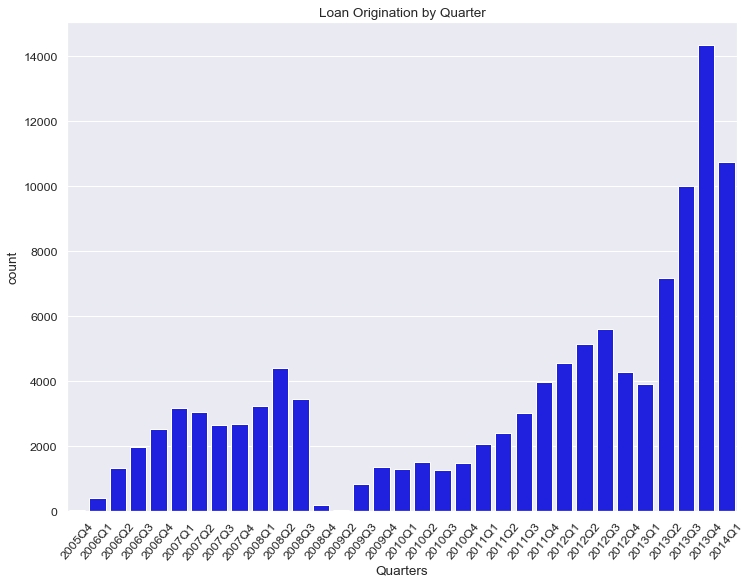

In [120]:
#Draw our distribution
plt.figure(figsize=(12, 9))
sb.set(style="darkgrid")
sb.set(font_scale=1.12)
sb.countplot(x='Quarters', data=Condensed_prosper, color="blue", order=quarters);
plt.xticks(rotation=50);
plt.title('Loan Origination by Quarter');

Aside from the Q4 2012 and the Q1 2013 prosper loans have increased quarter over quarter since 2010. What I find to be very interesting is that Q3 of 2008 prosper loans essentially fell off a cliff. The timing is peculiar because this is when the economic crisis of 2008 came to light. Prosper was clearly hit hard by this economic downturn. The next thing i'll be reviewing is credit grade to inspect the distribution of prosper's borrowers.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [138]:
#Use value counts to see our values in Credit Grade
Condensed_prosper['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [139]:
# Replace all nan's with the value "None"
Condensed_prosper['CreditGrade'] = Condensed_prosper['CreditGrade'].replace(np.nan, "None")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [141]:
#Use value counts to see our values in Credit Grade
Condensed_prosper['CreditGrade'].value_counts()

None    84984
C        5649
D        5153
B        4389
AA       3509
HR       3508
A        3315
E        3289
NC        141
Name: CreditGrade, dtype: int64

In [164]:
# Removing all rows that have No credit rating
creditgrade = Condensed_prosper[Condensed_prosper.CreditGrade != "None"]

In [165]:
# Checking to see that we have in fact correctly removed those rows
creditgrade.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

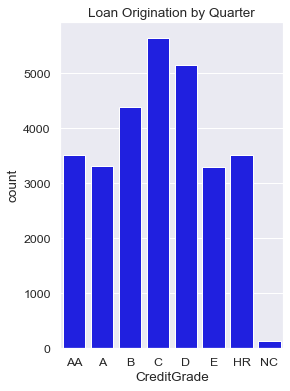

In [167]:
#Drawing our distribution
grade = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
plt.figure(figsize=(4, 6))
sb.set(style="darkgrid")
sb.set(font_scale=1.12)
sb.countplot(x='CreditGrade', data=creditgrade, color="blue", order=grade);
plt.title('Loan Origination by Quarter');

This plot is for the most part normally distributed with the highest number of ratings falling in the C category.
We'll now explore the Term variable to see how long are our borrowers taking out loans for. 

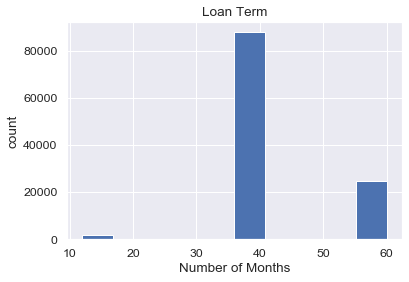

In [172]:
# Using Hist to plot our distribution for term
plt.hist(data = Condensed_prosper, x = 'Term');
plt.title('Loan Term')
plt.xlabel('Number of Months')
plt.ylabel('count');

Prosper loans are given in 12, 36 and 60 month terms. It's clear that the majority of our borrowers are opting for a 36 month term. Next I would like to find out what kind of interest rates are these borrowers agreeing to.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!